In [147]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [149]:
#Define the directory to store CSV files

directory = 'c:/users/sharo/Downloads/Inventory Sales/'

# Map each CSV filename to desired variable name "file_to_var"
file_to_var = { '2017PurchasePricesDec.csv': 'Purchase_price',
               'BegInvFINAL12312016.csv': 'BegInv',
               'EndInvFINAL12312016.csv': 'EndInv',
               'InvoicePurchases12312016.csv': 'Invoice',
               'PurchasesFINAL12312016.csv': 'Purchase',
               'SalesFINAL123120160.csv': 'Sales'}

#dictionary to store the Dataframes

dataframes = {}

# Loop through filenames and load each CSV into a dynamically named DataFrame
# Using items() allows you to iterate over both the keys and values of the dictionary simultaneously.
for filename, var_name in file_to_var.items():
    file_path = os.path.join(directory, filename)                  # constructs a full file path
    if os.path.exists(file_path):                                  # check if file exists
        dataframes[var_name] = pd.read_csv(file_path)              # loads CSV into dataframe
        print(f"Loaded {filename} into DataFrame '{var_name}'")
    else:
        print(f"File {filename} does not exist at {file_path}")

# Optionally, you can assign to globals if you need to use those variables directly
# For example:
globals().update(dataframes)

Loaded 2017PurchasePricesDec.csv into DataFrame 'Purchase_price'
Loaded BegInvFINAL12312016.csv into DataFrame 'BegInv'
Loaded EndInvFINAL12312016.csv into DataFrame 'EndInv'
Loaded InvoicePurchases12312016.csv into DataFrame 'Invoice'
Loaded PurchasesFINAL12312016.csv into DataFrame 'Purchase'
Loaded SalesFINAL123120160.csv into DataFrame 'Sales'


<b><span style="color: blue;"> Data cleaning- 


In [151]:
#Calculate Unique Values in BegInv and EndInv columns

uniques = {"BegInv": BegInv.nunique(), "EndInv": EndInv.nunique()}
print(uniques)

{'BegInv': InventoryId    206529
Store              79
City               67
Brand            8094
Description      7291
Size               41
onHand            474
Price             329
startDate           1
dtype: int64, 'EndInv': InventoryId    224489
Store              80
City               67
Brand            9653
Description      8732
Size               47
onHand            548
Price             354
endDate             1
dtype: int64}


In [8]:
#Counting any NA values
Purchase_price.isna().sum
BegInv.isna().sum
EndInv.isna().sum
Invoice.isna().sum
Purchase.isna().sum 
Sales.isna().sum

<bound method DataFrame.sum of          InventoryId  Store  Brand  Description   Size  SalesQuantity  \
0              False  False  False        False  False          False   
1              False  False  False        False  False          False   
2              False  False  False        False  False          False   
3              False  False  False        False  False          False   
4              False  False  False        False  False          False   
...              ...    ...    ...          ...    ...            ...   
1048570        False  False  False        False  False          False   
1048571        False  False  False        False  False          False   
1048572        False  False  False        False  False          False   
1048573        False  False  False        False  False          False   
1048574        False  False  False        False  False          False   

         SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0               Fals

#Creating Dataframe and Back Filling any missing values with Backward Fill method

PP_Fill = pd.DataFrame(Purchase_price).bfill()
Beg_Inv = pd.DataFrame(BegInv).bfill()
End_Inv = pd.DataFrame(EndInv).bfill()
Invoice = pd.DataFrame(Invoice).bfill()
Purchase = pd.DataFrame(Purchase).bfill()
Sales = pd.DataFrame(Sales).bfill()


In [153]:
#Mean price of beginning inventories and mean price of ending inventories

print(np.mean(Beg_Inv['Price']));
print(np.mean(End_Inv['Price']));

22.253910104634222
23.585582946157718


<b><span style="color: blue;">Plot of Price and Store

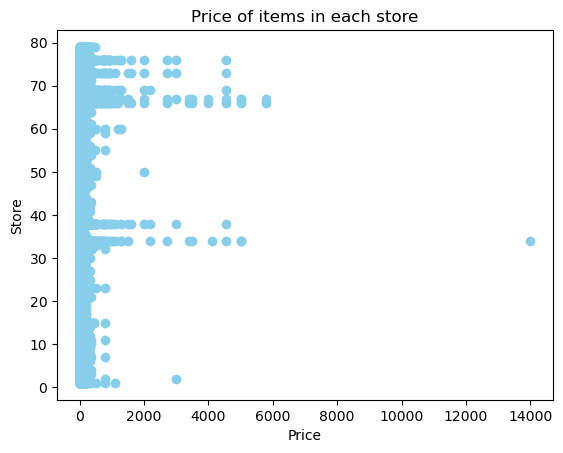

In [155]:
plt.scatter(Beg_Inv['Price'],Beg_Inv['Store'], color ='skyblue')
plt.title('Price of items in each store')
plt.xlabel('Price')
plt.ylabel('Store')
plt.show()

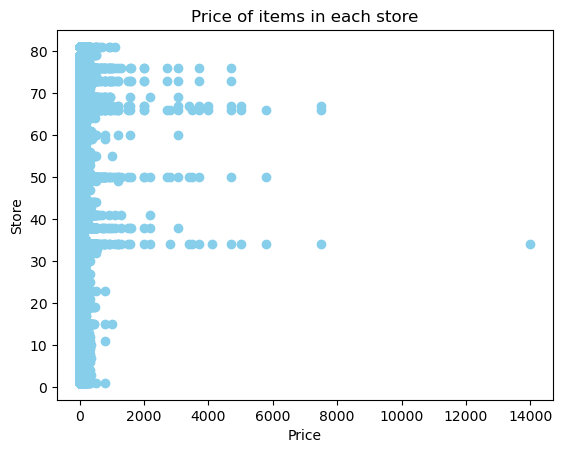

In [14]:
plt.scatter(End_Inv['Price'],End_Inv['Store'], color ='skyblue')
plt.title('Price of items in each store')
plt.xlabel('Price')
plt.ylabel('Store')
plt.show()

<b><span style="color: blue;">Calculating Lead Time from Order Date to Receiving Date

In [157]:
#Converting Dates to Datetime
Purchase['PODate'] = pd.to_datetime(Purchase['PODate'])
Purchase['ReceivingDate'] = pd.to_datetime(Purchase['ReceivingDate'])

#Calculate Lead Time 
Purchase['Lead-Time']= (Purchase['ReceivingDate'] - Purchase['PODate']).dt.days

print(Purchase.head())

           InventoryId  Store  Brand                   Description   Size  \
0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   

   VendorNumber                   VendorName  PONumber     PODate  \
0         105.0  ALTAMAR BRANDS LLC             8124.0 2015-12-21   
1        4466.0  AMERICAN VINTAGE BEVERAGE      8137.0 2015-12-22   
2        4466.0  AMERICAN VINTAGE BEVERAGE      8137.0 2015-12-22   
3        4466.0  AMERICAN VINTAGE BEVERAGE      8137.0 2015-12-22   
4         388.0  ATLANTIC IMPORTING COMPANY     8169.0 2015-12-24   

  ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  Dollars  \
0    2016-01-02  2016-01-04  2016-02-16      

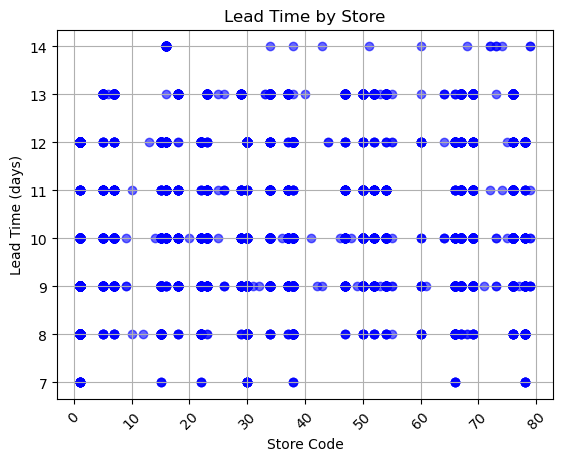

In [159]:
#Plot Lead time by each store ID
plt.scatter(Purchase['Store'], Purchase['Lead-Time'], color = 'b', alpha= 0.6)
plt.title('Lead Time by Store')
plt.ylabel('Lead Time (days)')
plt.xlabel('Store Code')
plt.xticks(rotation=45)  # Rotate store codes for better readability
plt.grid(True)

<b><span style="color: blue;"> Create new columns Order Month, Order Year, Order Day of Week using PayDate column. 

In [161]:
Invoice['PayDate'] = pd.to_datetime(Invoice['PayDate'])
Invoice['Order Month'] = Invoice['PayDate'].dt.month 
Invoice['Order Year'] = Invoice['PayDate'].dt.year
Invoice['Order Day of Week'] = Invoice['PayDate'].dt.dayofweek

<b><span style="color: blue;">MONTHLY SALE TREND

Sales increases from starting the month of July until February. There is a decline in sales in 3rd, 4th, 5th, and 6th month

In [165]:
import plotly.express as px # plotly.express allows to plot interactive plots with minimun coding

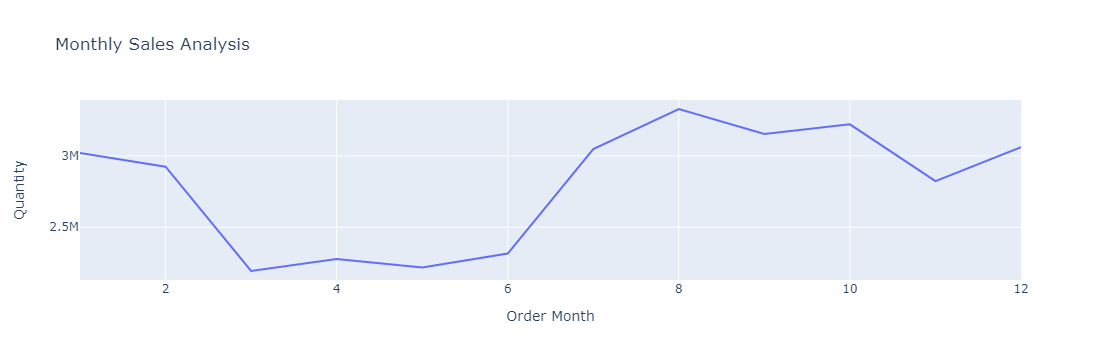

In [167]:
Monthly_Sales = Invoice.groupby('Order Month')['Quantity'].sum().reset_index()
fig = px.line(Monthly_Sales, x= 'Order Month', y = 'Quantity', title= 'Monthly Sales Analysis')
fig.show()

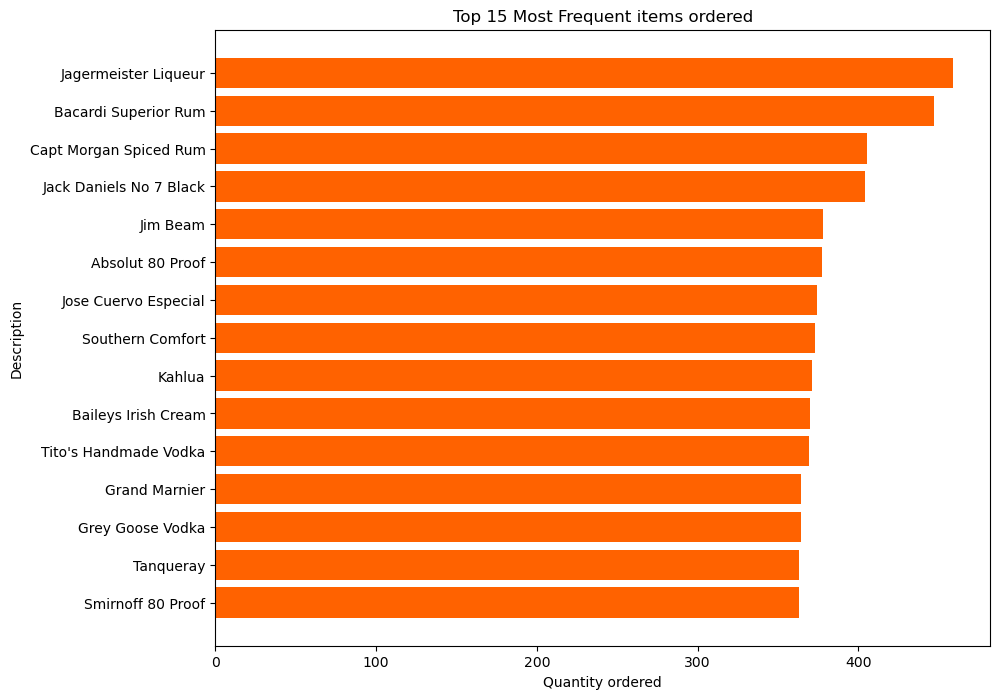

Description
Jagermeister Liqueur       459
Bacardi Superior Rum       447
Capt Morgan Spiced Rum     405
Jack Daniels No 7 Black    404
Jim Beam                   378
Absolut 80 Proof           377
Jose Cuervo Especial       374
Southern Comfort           373
Kahlua                     371
Baileys Irish Cream        370
Tito's Handmade Vodka      369
Grand Marnier              364
Grey Goose Vodka           364
Tanqueray                  363
Smirnoff 80 Proof          363
Name: count, dtype: int64

In [169]:
description_counts = Beg_Inv['Description'].value_counts()

# Get the top 10 descriptions
top_15_ordered = description_counts[:15]

top_15_ordered

plt.figure(figsize=(10,8))
plt.barh(top_15_ordered.index[::-1], top_15_ordered.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Quantity ordered')
plt.ylabel('Description')
plt.title('Top 15 Most Frequent items ordered')

# Show the plot
plt.show()
top_15_ordered

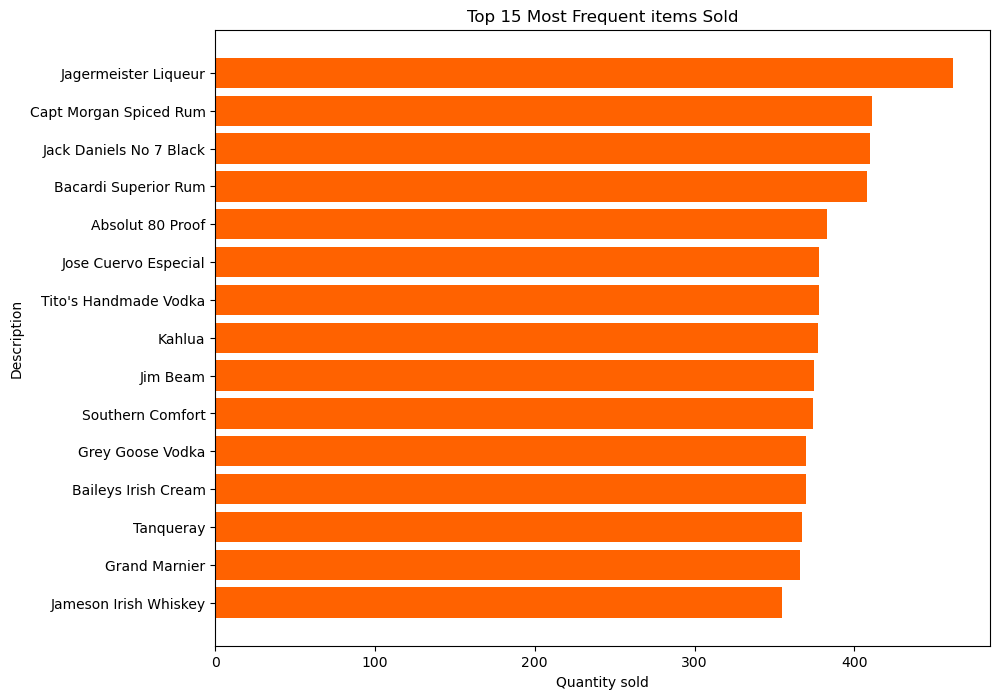

Description
Jagermeister Liqueur       462
Capt Morgan Spiced Rum     411
Jack Daniels No 7 Black    410
Bacardi Superior Rum       408
Absolut 80 Proof           383
Jose Cuervo Especial       378
Tito's Handmade Vodka      378
Kahlua                     377
Jim Beam                   375
Southern Comfort           374
Grey Goose Vodka           370
Baileys Irish Cream        370
Tanqueray                  367
Grand Marnier              366
Jameson Irish Whiskey      355
Name: count, dtype: int64

In [171]:
description_counts = End_Inv['Description'].value_counts()

# Get the top 15 descriptions
top_15_sold = description_counts[:15]



plt.figure(figsize=(10,8))
plt.barh(top_15_sold.index[::-1], top_15_sold.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Quantity sold')
plt.ylabel('Description')
plt.title('Top 15 Most Frequent items Sold')

# Show the plot
plt.show()
top_15_sold

<b><span style="color: blue;">MERGING SALES AND PURCHASE DATASETS ON COMMON COLUMNS


In [174]:
sales_purch = pd.merge(Sales, Purchase[['Brand','PurchasePrice', 'Description', 'Size', 'InventoryId','VendorNumber', 'Store','VendorName']],
                       on=['InventoryId','VendorNumber', 'Store', 'Brand', 'Description','Size'])
sales_purch = sales_purch[['Brand', 'SalesQuantity', 'SalesPrice','PurchasePrice','Description','Size']]

<b><span style="color: blue;">Calculating top 15 products with overall highest Sales and its quantity

In [177]:
#Total sales for each product
sales_purch['TotalSales']= sales_purch['SalesQuantity'] * sales_purch['SalesPrice']

#Group by Product Description to get total sales for each product
total_sales_per_product = sales_purch.groupby(['Description', 'Size']).agg(Total_Sales=('TotalSales', 'sum'),
    Total_Quantity=('SalesQuantity', 'sum')).reset_index()
top_15_products = total_sales_per_product.sort_values( by = 'Total_Sales', ascending = False).head(15)
print(top_15_products)

                  Description   Size  Total_Sales  Total_Quantity
402    Capt Morgan Spiced Rum  1.75L    121129.92            5508
1080          Ketel One Vodka  1.75L    110055.41            3659
1788    Tito's Handmade Vodka  1.75L    104409.10            3490
952   Jack Daniels No 7 Black  1.75L     86376.00            2400
874          Grey Goose Vodka  750mL     78435.31            3269
18           Absolut 80 Proof  1.75L     59290.85            2315
1050                   Kahlua  1.75L     37406.25            1175
998                  Jim Beam  1.75L     35430.76            1524
979     Jameson Irish Whiskey  750mL     34986.28            1472
1294      New Amsterdam Vodka  1.75L     33141.07            2193
142       Baileys Irish Cream  750mL     30140.84            1516
1210              Makers Mark  1.75L     29341.80             620
1024     Jose Cuervo Especial  1.75L     29212.76            1124
568               Crown Royal  1.75L     28880.80             720
373       

<b><span style="color: blue;">CALCULATING AGGREGATE SALES PROFIT AND VOLUME

Profit is calculated as Profit=(Sales Price−Purchase Price) × Sales Quantity and is diplayed using bar chat. We can compare products that eventhough sells less but has higher profit versus products that sells more with high profits.
Jack Daniels are selling less in volumes but yeilds more profit and Captain Morgan sells more and also yeilds high profit. CM are the most favored liquor in the market.

C:\Users\sharo\AppData\Local\Temp\ipykernel_10348\3037288716.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



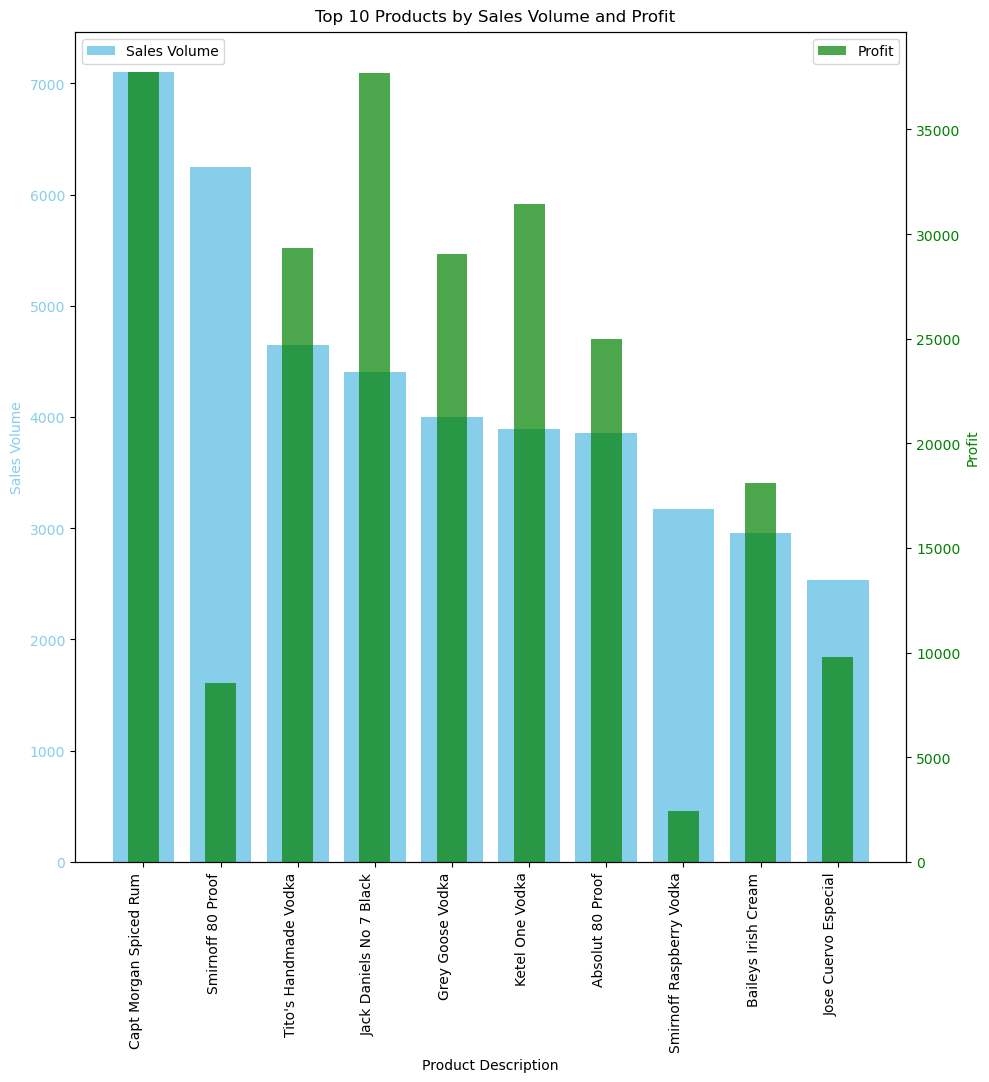

In [179]:
# Calculate Profit
sales_purch['Profit'] = (sales_purch['SalesPrice'] - sales_purch['PurchasePrice']) * sales_purch['SalesQuantity']

# Calculate total sales volume and profit per product
sales_volume_and_profit = sales_purch.groupby('Description').agg({
    'SalesQuantity': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort products by total sales volume in descending order and select top 10
top_products = sales_volume_and_profit.sort_values(by='SalesQuantity', ascending=False).head(10)

# Plot sales volume and profit using side-by-side bar charts
fig, ax1 = plt.subplots(figsize=(10, 11))

# Bar chart for sales volume
ax1.bar(top_products['Description'], top_products['SalesQuantity'], color='skyblue', label='Sales Volume')
ax1.set_xlabel('Product Description')
ax1.set_ylabel('Sales Volume', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_products['Description'], rotation=90, ha='right')

# Add a second y-axis for profit
ax2 = ax1.twinx()
ax2.bar(top_products['Description'], top_products['Profit'], color='green', alpha=0.7, label='Profit', width=0.4)
ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding titles and legends
fig.suptitle('Top 10 Products by Sales Volume and Profit')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Herein, products that sells more but yeilds less profits like Smirnoff 80 Proof, Smirnoff Rasberry Vodka and Jose Cuervo Especial. Among the top 10 products, these products could be investigated further.

Preprocessing Data -convert dates to timestamps and aggregate sales, begining inventory and ending inventory data to merge

Inventory Turnover is calculated as IT = COGS/Avg. Inventory

Calculate Average Inventory

In [240]:

# Converting dates to datetime objects
Sales['SalesDate'] = pd.to_datetime(Sales['SalesDate'])
BegInv['startDate'] = pd.to_datetime(BegInv['startDate'])
EndInv['endDate'] = pd.to_datetime(EndInv['endDate'])

# Extract year and month for aggregation
Sales['YearMonth'] = Sales['SalesDate'].dt.to_period('M').dt.to_timestamp()
BegInv['YearMonth'] = BegInv['startDate'].dt.to_period('M').dt.to_timestamp()
EndInv['YearMonth'] = EndInv['endDate'].dt.to_period('M').dt.to_timestamp()

# Aggregate sales data
sales_agg = Sales.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth']) \
                    .agg({'SalesQuantity': 'sum', 'SalesDollars': 'sum'}).reset_index()

# Aggregate beginning inventory data
beginv_agg = BegInv.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth']) \
                    .agg({'onHand': 'sum', 'Price': 'mean'}).reset_index()

# Aggregate ending inventory data
endinv_agg = EndInv.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth']) \
                    .agg({'onHand': 'sum', 'Price': 'mean'}).reset_index()

print(sales_agg.isna().sum())
print(beginv_agg.isna().sum())
print(endinv_agg.isna().sum())
print(endinv_agg.head())
print(beginv_agg.head())

InventoryId      0
Store            0
Brand            0
Description      0
YearMonth        0
SalesQuantity    0
SalesDollars     0
dtype: int64
InventoryId    0
Store          0
Brand          0
Description    0
YearMonth      0
onHand         0
Price          0
dtype: int64
InventoryId    0
Store          0
Brand          0
Description    0
YearMonth      0
onHand         0
Price          0
dtype: int64
        InventoryId  Store  Brand                   Description  YearMonth  \
0   10_HORNSEY_1001     10   1001           Baileys 50mL 4 Pack 2016-12-01   
1   10_HORNSEY_1003     10   1003  Crown Royal VAP Glass+Coastr 2016-12-01   
2  10_HORNSEY_10058     10  10058   F Coppola Dmd Ivry Cab Svgn 2016-12-01   
3  10_HORNSEY_10062     10  10062      B de Beauchene CDR Rouge 2016-12-01   
4  10_HORNSEY_10164     10  10164    Andre Bourgogne Pnt Nr RSV 2016-12-01   

   onHand  Price  
0       0   5.99  
1      73  22.99  
2      24  14.99  
3      15   8.99  
4      19  15.99  
       

In [244]:
print("Columns in endinv_agg:", endinv_agg.columns)
print("Columns in beginv_agg:", beginv_agg.columns)
print(endinv_agg.head())
print(beginv_agg.head())

Columns in endinv_agg: Index(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth', 'onHand',
       'Price'],
      dtype='object')
Columns in beginv_agg: Index(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth', 'onHand',
       'Price'],
      dtype='object')
        InventoryId  Store  Brand                   Description  YearMonth  \
0   10_HORNSEY_1001     10   1001           Baileys 50mL 4 Pack 2016-12-01   
1   10_HORNSEY_1003     10   1003  Crown Royal VAP Glass+Coastr 2016-12-01   
2  10_HORNSEY_10058     10  10058   F Coppola Dmd Ivry Cab Svgn 2016-12-01   
3  10_HORNSEY_10062     10  10062      B de Beauchene CDR Rouge 2016-12-01   
4  10_HORNSEY_10164     10  10164    Andre Bourgogne Pnt Nr RSV 2016-12-01   

   onHand  Price  
0       0   5.99  
1      73  22.99  
2      24  14.99  
3      15   8.99  
4      19  15.99  
        InventoryId  Store  Brand                  Description  YearMonth  \
0   10_HORNSEY_1000     10   1000   Goslings Dark'n Stormy V

<b><span style="color: red;"> Price End and on Hand End are showing NaN which is not working for me to calculate avg inventory turnover 

In [250]:

# Merge ending inventory with sales data
inventory_merge = pd.merge(beginv_agg, endinv_agg, on=['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth'], how='left', suffixes=( '_Start','_End'))
print("Columns after merging:", inventory_merge.columns)
print(inventory_merge.head())

# Merge with beginning inventory data
#inventory_sales_df = pd.merge(inventory_sales_df, beginv_agg, on=['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth'], how='left', suffixes=( '_Start','_End'))

# Check column names
#print("Columns in inventory_sales_df:", inventory_sales_df.columns)

Columns after merging: Index(['InventoryId', 'Store', 'Brand', 'Description', 'YearMonth',
       'onHand_Start', 'Price_Start', 'onHand_End', 'Price_End'],
      dtype='object')
        InventoryId  Store  Brand                  Description  YearMonth  \
0   10_HORNSEY_1000     10   1000   Goslings Dark'n Stormy VAP 2016-01-01   
1   10_HORNSEY_1001     10   1001          Baileys 50mL 4 Pack 2016-01-01   
2   10_HORNSEY_1005     10   1005      Maker's Mark Combo Pack 2016-01-01   
3  10_HORNSEY_10058     10  10058  F Coppola Dmd Ivry Cab Svgn 2016-01-01   
4   10_HORNSEY_1006     10   1006  Jim Beam Candy Cane 4/50mLs 2016-01-01   

   onHand_Start  Price_Start  onHand_End  Price_End  
0             1        14.99         NaN        NaN  
1            11         5.99         NaN        NaN  
2            18        34.99         NaN        NaN  
3            52        14.99         NaN        NaN  
4             1         3.99         NaN        NaN  


In [258]:
print(inventory_merge.isna().sum())  # Check which columns have NaNs


InventoryId          0
Store                0
Brand                0
Description          0
YearMonth            0
onHand_Start         0
Price_Start          0
onHand_End      206529
Price_End       206529
dtype: int64
